In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, json, glob, pdb
from IPython.display import display

In [2]:
DATA_DIR = '/Users/pozzolabadmin/Documents/codebase/hyak_results/micelles_omiecs/results_SQ_sph_newDOP/' 
EXPTDATA_DIR = "/Users/pozzolabadmin/Documents/codebase/data/micelles_omiecs_sage/"

In [3]:
SI = pd.read_csv(EXPTDATA_DIR + 'sample_info_OMIECS.csv')
fit_keys = ['B_radius_core', 'B_radius_core_pd', 'B_rg', 'B_rg_pd', 'A_radius_effective', 'A_volfraction']

def get_fitted_values(fname):
    flag = SI["Filename"]=='%s.sub'%fname
    metadata = SI[flag]
    with open(DATA_DIR+'%s.json'%fname) as f:
        params = json.load(f)

    fit_vals =  [params[key] for key in fit_keys]

    return metadata, fit_vals 


In [4]:
files = glob.glob(DATA_DIR+"*.json")
fnames = [f.split('/')[-1].split('.')[0] for f in files]

metadata_keys = ["Matrix", "GP_conc_tar", "Solvent"]
params_dict = {}
for fname in sorted(fnames):
    metadata, fit_vals = get_fitted_values(fname)
    metadata_vals = [metadata[key].values[0] for key in metadata_keys] 
    params_dict[metadata["Sample"].values[0]] = metadata_vals + fit_vals

In [5]:
params_df = pd.DataFrame(params_dict).T
params_df.columns = metadata_keys + fit_keys 
params_df

,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
125,DEG50F25,10.0,dTHF75,77.915543,0.493851,28.884311,0.3,50.978439,0.106509
132,DEG50F25b,10.0,dTHF75,80.519801,0.494505,39.385624,0.299999,54.53882,0.19307
933,DEG50F25b,10.0,dTol,68.460891,0.493882,50.278145,0.3,49.660588,0.382899
116,DEG50F50,10.0,dTHF50,122.98319,0.195847,28.017392,0.202615,37.958589,0.0
127,DEG50F50,10.0,dTHF75,106.818594,0.493172,27.102336,0.299901,67.80293,0.057149
931,DEG50F50,10.0,dTol,75.402106,0.490551,29.850261,0.3,52.600023,0.206206
118,DEG50F75,10.0,dTHF50,151.861914,0.116871,43.658416,0.299455,64.552206,0.062337
129,DEG50F75,10.0,dTHF75,145.786843,0.303177,55.125443,0.3,12.88578,0.20532
932,DEG50F75,10.0,dTol,98.712966,0.475875,26.403031,0.299998,24.350184,0.107236
950,PEG50F25,10.0,dCF,28.412689,0.488072,64.183777,0.3,56.227112,0.264298


,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
951,PEG50F50,10.0,dCF,91.52716,0.476453,200.0,0.007491,78.112627,0.603296
141,PEG50F50,10.0,dTHF,89.802588,0.353885,200.0,0.000009,76.704011,0.626442
138,PEG50F50,10.0,dTHF25,67.557982,0.103993,48.013278,0.162406,100.0,0.072873
139,PEG50F50,10.0,dTHF50,71.966373,0.355257,44.325586,0.189366,88.518902,0.104565
140,PEG50F50,10.0,dTHF75,90.241934,0.133392,48.376322,0.227756,87.75816,0.196501
935,PEG50F50,10.0,dTol,88.055384,0.199897,53.356333,0.299994,99.347115,0.321163


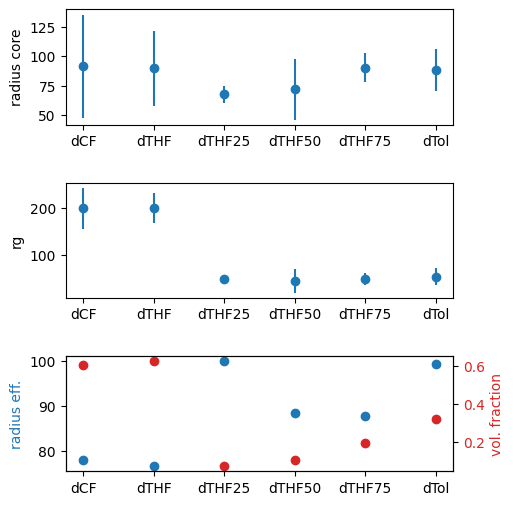

In [47]:
query_df = params_df.query('Matrix == "PEG50F50" & GP_conc_tar==10.0')
display(query_df)

def plot_query_df(query_df):
    fig, axs = plt.subplots(3,1,figsize=(1*5, 3*2))
    [ax.xaxis.set_ticks(np.arange(len(query_df))) for ax in axs]
    fig.subplots_adjust(hspace=0.5)
    axs = axs.flatten()
    radius_core_sd = query_df["B_radius_core"]* query_df["B_radius_core_pd"]
    axs[0].errorbar(np.arange(len(query_df)), query_df["B_radius_core"].to_numpy(), 
                    yerr = radius_core_sd.to_numpy(),
                    marker='o', ls="none"
                    )
    axs[0].set_ylabel("radius core")
    rg_sd = query_df["B_rg"]* query_df["B_rg_pd"]
    axs[1].errorbar(np.arange(len(query_df)), query_df["B_rg"].to_numpy(), 
                    yerr = radius_core_sd.to_numpy(),
                    marker='o', ls="none"
                    )
    axs[1].set_ylabel("rg")
    axs[2].scatter(np.arange(len(query_df)), query_df["A_radius_effective"].to_numpy())
    axs2_twinx = axs[2].twinx()
    axs2_twinx.scatter(np.arange(len(query_df)), query_df["A_volfraction"].to_numpy(), color="tab:red")
    axs2_twinx.tick_params(axis='y', labelcolor="tab:red")
    axs[2].set_ylabel("radius eff.", color="tab:blue")
    axs2_twinx.set_ylabel("vol. fraction", color="tab:red")

    return fig, axs 

fig, axs = plot_query_df(query_df)
[ax.set_xticklabels(query_df["Solvent"].to_list()) for ax in axs]
plt.savefig("PEG50F50_10_x.png")

,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
971,PEG50F50,1.0,dTHF50,70.967544,0.159788,39.919986,0.268786,39.883235,0.074672
965,PEG50F50,5.0,dTHF50,113.367599,0.488209,199.999998,0.3,29.628614,0.277906
139,PEG50F50,10.0,dTHF50,71.966373,0.355257,44.325586,0.189366,88.518902,0.104565


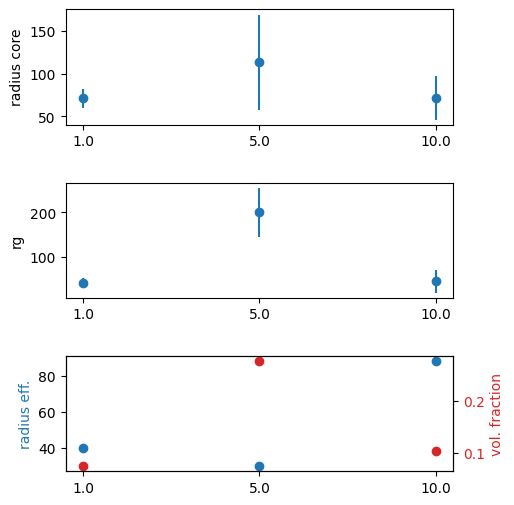

In [50]:
query_df = params_df.query(' Matrix == "PEG50F50" & Solvent=="dTHF50" ').sort_values(by=['GP_conc_tar'])
display(query_df)
fig, axs = plot_query_df(query_df)
[ax.set_xticklabels(query_df["GP_conc_tar"].to_list()) for ax in axs]
plt.savefig("PEG50F50_x_dTHF50.png")

,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
141,PEG50F50,10.0,dTHF,89.802588,0.353885,200.0,0.000009,76.704011,0.626442
138,PEG50F50,10.0,dTHF25,67.557982,0.103993,48.013278,0.162406,100.0,0.072873
139,PEG50F50,10.0,dTHF50,71.966373,0.355257,44.325586,0.189366,88.518902,0.104565
140,PEG50F50,10.0,dTHF75,90.241934,0.133392,48.376322,0.227756,87.75816,0.196501


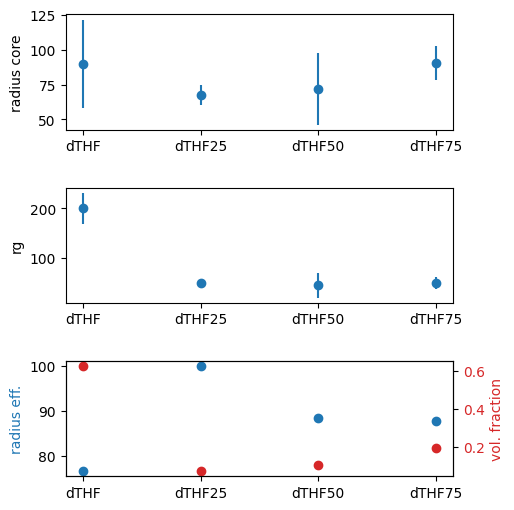

In [51]:
query_df = params_df.query(' Matrix == "PEG50F50" & GP_conc_tar==10.0 & Solvent.str.contains("dTHF")', engine='python')
display(query_df)
fig, axs = plot_query_df(query_df)
[ax.set_xticklabels(query_df["Solvent"].to_list()) for ax in axs]
plt.savefig("PEG50F50_10_dTHFx.png")

,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
116,DEG50F50,10.0,dTHF50,122.98319,0.195847,28.017392,0.202615,37.958589,0.0
127,DEG50F50,10.0,dTHF75,106.818594,0.493172,27.102336,0.299901,67.80293,0.057149
931,DEG50F50,10.0,dTol,75.402106,0.490551,29.850261,0.3,52.600023,0.206206


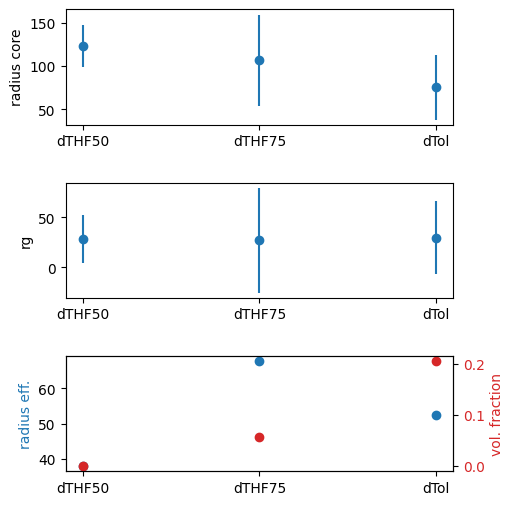

In [52]:
query_df = params_df.query('Matrix == "DEG50F50" & GP_conc_tar==10.0')
display(query_df)
fig, axs = plot_query_df(query_df)
[ax.set_xticklabels(query_df["Solvent"].to_list()) for ax in axs]
plt.savefig("DEG50F50_10_x.png")

,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
118,DEG50F75,10.0,dTHF50,151.861914,0.116871,43.658416,0.299455,64.552206,0.062337
129,DEG50F75,10.0,dTHF75,145.786843,0.303177,55.125443,0.3,12.88578,0.20532
932,DEG50F75,10.0,dTol,98.712966,0.475875,26.403031,0.299998,24.350184,0.107236


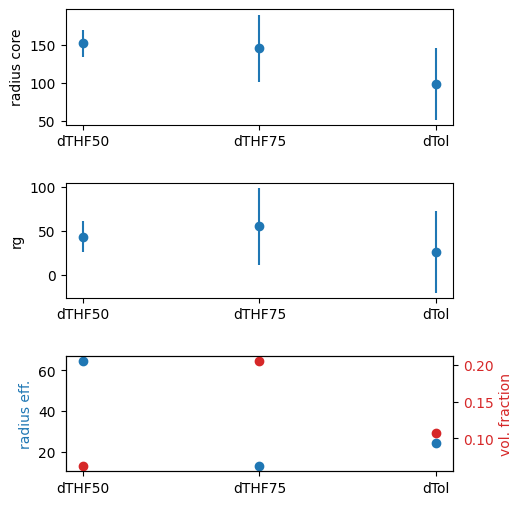

In [53]:
query_df = params_df.query('Matrix == "DEG50F75" & GP_conc_tar==10.0')
display(query_df)
fig, axs = plot_query_df(query_df)
[ax.set_xticklabels(query_df["Solvent"].to_list()) for ax in axs]
plt.savefig("DEG50F75_10_x.png")

,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
970,PEG50F25,1.0,dTHF50,62.934809,0.486747,51.459151,0.299999,23.959842,0.102425
964,PEG50F25,5.0,dTHF50,71.601595,0.036068,57.249684,0.262985,48.93756,0.16863
135,PEG50F25,10.0,dTHF50,80.346425,0.20603,50.755868,0.244193,83.39799,0.203481


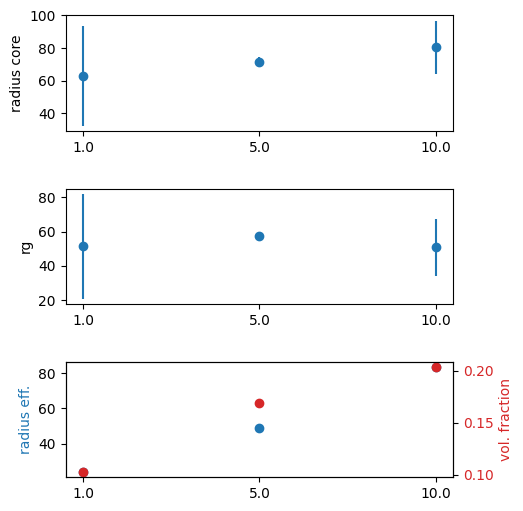

In [54]:
query_df = params_df.query(' Matrix == "PEG50F25" & Solvent=="dTHF50" ').sort_values(by=['GP_conc_tar'])
display(query_df)
fig, axs = plot_query_df(query_df)
[ax.set_xticklabels(query_df["GP_conc_tar"].to_list()) for ax in axs]
plt.savefig("PEG50F25_x_dTHF50.png")

,Matrix,GP_conc_tar,Solvent,B_radius_core,B_radius_core_pd,B_rg,B_rg_pd,A_radius_effective,A_volfraction
137,PEG50F25,10.0,dTHF,71.521221,0.2675,199.999993,0.299999,58.763859,0.561637
134,PEG50F25,10.0,dTHF25,62.526115,0.140174,43.389472,0.253642,99.999999,0.050864
135,PEG50F25,10.0,dTHF50,80.346425,0.20603,50.755868,0.244193,83.39799,0.203481
136,PEG50F25,10.0,dTHF75,89.121318,0.242277,47.723023,0.242706,88.367592,0.228772


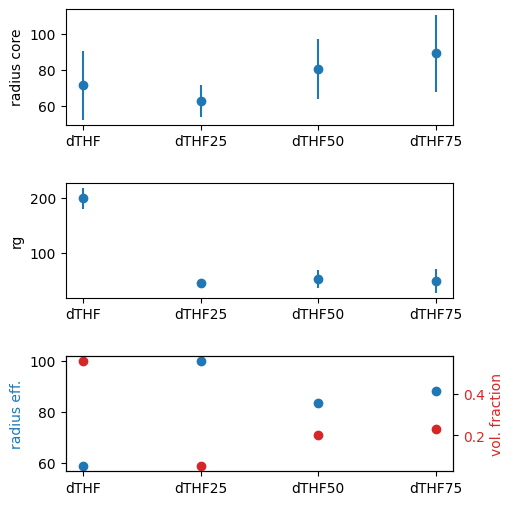

In [55]:
query_df = params_df.query(' Matrix == "PEG50F25" & GP_conc_tar==10.0 & Solvent.str.contains("dTHF")', engine='python')
display(query_df)
fig, axs = plot_query_df(query_df)
[ax.set_xticklabels(query_df["Solvent"].to_list()) for ax in axs]
plt.savefig("PEG50F25_10_dTHFx.png")